In [1]:
import numpy as np   # linear algebra
import pandas as pd  # data processing

In [2]:
data=pd.read_csv('/Users/rajatkumarjena/Downloads/tea-consumption-by-country-2024.csv')  #loading in the dataset

In [3]:
data.head()

,country,TeaConsumption_AnnualPerCapita_Kg_2022,TeaConsumption_AnnualTotal_1000tons_2022,TeaConsumption_AnnualPerCapita_Kg_2021,TeaConsumption_AnnualTotal_1000tons_2021,TeaConsumption_AnnualPerCapita_Kg_2020,TeaConsumption_AnnualTotal_1000tons_2020,TeaConsumption_AnnualPerCapita_Kg_2019,TeaConsumption_AnnualTotal_1000tons_2019
0,India,4.187538,5969.0,0.000707,1.0,0.011407,16.0,0.83,1153.0
1,China,10.195905,14531.0,NaN,NaN,NaN,NaN,NaN,NaN
2,United States,0.486042,166.0,0.158748,54.0,0.164980,56.0,0.45,150.0
3,Indonesia,2.137495,596.0,0.003613,1.0,0.010916,3.0,0.36,98.0
4,Pakistan,1.001227,244.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df=data.copy()  #I am making a copy of my dataset. I will continue to work on 'df' while 'data' will be my backup.

In [5]:
df.head()

,country,TeaConsumption_AnnualPerCapita_Kg_2022,TeaConsumption_AnnualTotal_1000tons_2022,TeaConsumption_AnnualPerCapita_Kg_2021,TeaConsumption_AnnualTotal_1000tons_2021,TeaConsumption_AnnualPerCapita_Kg_2020,TeaConsumption_AnnualTotal_1000tons_2020,TeaConsumption_AnnualPerCapita_Kg_2019,TeaConsumption_AnnualTotal_1000tons_2019
0,India,4.187538,5969.0,0.000707,1.0,0.011407,16.0,0.83,1153.0
1,China,10.195905,14531.0,NaN,NaN,NaN,NaN,NaN,NaN
2,United States,0.486042,166.0,0.158748,54.0,0.164980,56.0,0.45,150.0
3,Indonesia,2.137495,596.0,0.003613,1.0,0.010916,3.0,0.36,98.0
4,Pakistan,1.001227,244.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns = ['country', '2022', 'Annual(kt)_2022', '2021', 'Annual(kt)_2021', '2020', 'Annual(kt)_2020'
              , '2019', 'Annual(kt)_2019']
#Beautifying column name

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          175 non-null    object 
 1   2022             131 non-null    float64
 2   Annual(kt)_2022  131 non-null    float64
 3   2021             85 non-null     float64
 4   Annual(kt)_2021  85 non-null     float64
 5   2020             82 non-null     float64
 6   Annual(kt)_2020  82 non-null     float64
 7   2019             165 non-null    float64
 8   Annual(kt)_2019  114 non-null    float64
dtypes: float64(8), object(1)
memory usage: 12.4+ KB


In [8]:
df.isnull().sum() #finding total missing values

country             0
2022               44
Annual(kt)_2022    44
2021               90
Annual(kt)_2021    90
2020               93
Annual(kt)_2020    93
2019               10
Annual(kt)_2019    61
dtype: int64

In [9]:
#As this dataset is categorised by countries, we can't simply delete the rows with missing values. 
#Rather we have to fill the missing cells with values. We can't replace null values with 0 either.
#This is beacause we have to assume that the tea consumption in that particular country happened, it just wasn't recorded.

In [10]:
df.iloc[:, 1:] = df.iloc[:, 1:].fillna(df.iloc[:, 1:].mean()) 

In [11]:
#we selected every column except the first as it is an object so it can't calculate a mean and will throw an error.
#also we saw beforehand that the Country column doesn't have null values, so we can skip it alltogether.

In [12]:
df.isnull().sum() #making sure all null values have been replaced.

country            0
2022               0
Annual(kt)_2022    0
2021               0
Annual(kt)_2021    0
2020               0
Annual(kt)_2020    0
2019               0
Annual(kt)_2019    0
dtype: int64

In [13]:
#now that the data is clean, we can proceed to visualization.

In [14]:
# Visualization - Matplotlib (base plots)
import matplotlib.pyplot as plt

# Visualization - Seaborn (prettier and statistical plots)
import seaborn as sns

# Interactive & Geographical Visualization - Plotly
import plotly.express as px

In [15]:
df1= df.copy()

In [16]:
df.drop(df.columns[[2, 4, 6, 8]], axis=1, inplace=True) #for simplicity in visualization let's drop the unnecessary columns.

In [17]:
df.head()

,country,2022,2021,2020,2019
0,India,4.187538,0.000707,0.011407,0.830000
1,China,10.195905,1.142170,1.165799,0.761333
2,United States,0.486042,0.158748,0.164980,0.450000
3,Indonesia,2.137495,0.003613,0.010916,0.360000
4,Pakistan,1.001227,1.142170,1.165799,0.761333


In [25]:
#Let's see how tea consumption has changed in countries overtime. 
#To make visualizations more readable, we will take the top 10 countries of 2022

In [19]:
top_countries = df.sort_values(by='2022', ascending=False).head(10)['country']

year_cols = ['2019', '2020', '2021', '2022']  #Put years in correct (ascending) order
df_top = df[df['country'].isin(top_countries)][['country'] + year_cols]

In [27]:
df_top.head(10)

,country,2019,2020,2021,2022
1,China,0.761333,1.165799,1.142170,10.195905
15,Vietnam,1.010000,1.165799,1.142170,10.202577
17,Turkey,3.250000,2.288258,2.076453,14.748703
29,Uganda,0.761333,1.165799,1.142170,6.890328
33,Argentina,17.900000,17.768632,18.670427,27.153865
58,Sri Lanka,0.110000,0.044323,0.132156,47.952704
59,Malawi,0.761333,1.165799,1.142170,10.063835
103,Paraguay,18.710000,16.960086,16.007947,14.200217
124,Uruguay,8.990000,9.414617,9.126505,9.142089
144,Mauritius,1.420000,0.779290,0.781482,4.701715


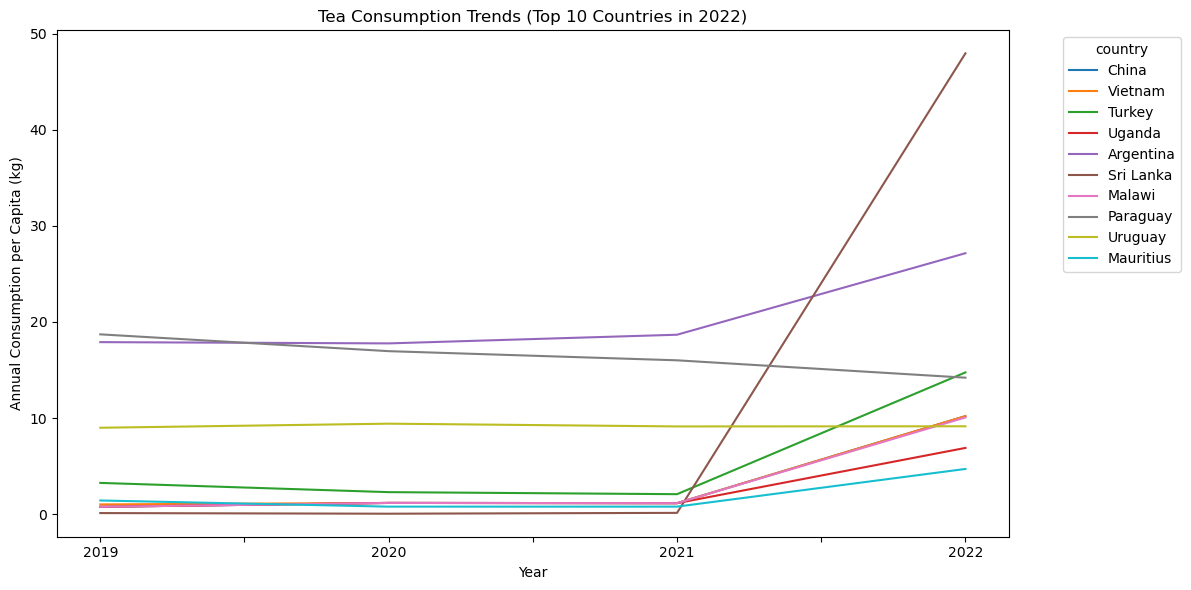

In [28]:
# Line chart
df_top.set_index('country').T.plot(figsize=(12,6))
plt.title("Tea Consumption Trends (Top 10 Countries in 2022)")
plt.xlabel("Year")
plt.ylabel("Annual Consumption per Capita (kg)")
plt.legend(title='country', bbox_to_anchor=(1.05, 1))
plt.tight_layout()

Text(0.5, 1.0, 'Tea Consumption Heatmap by Country and Year')

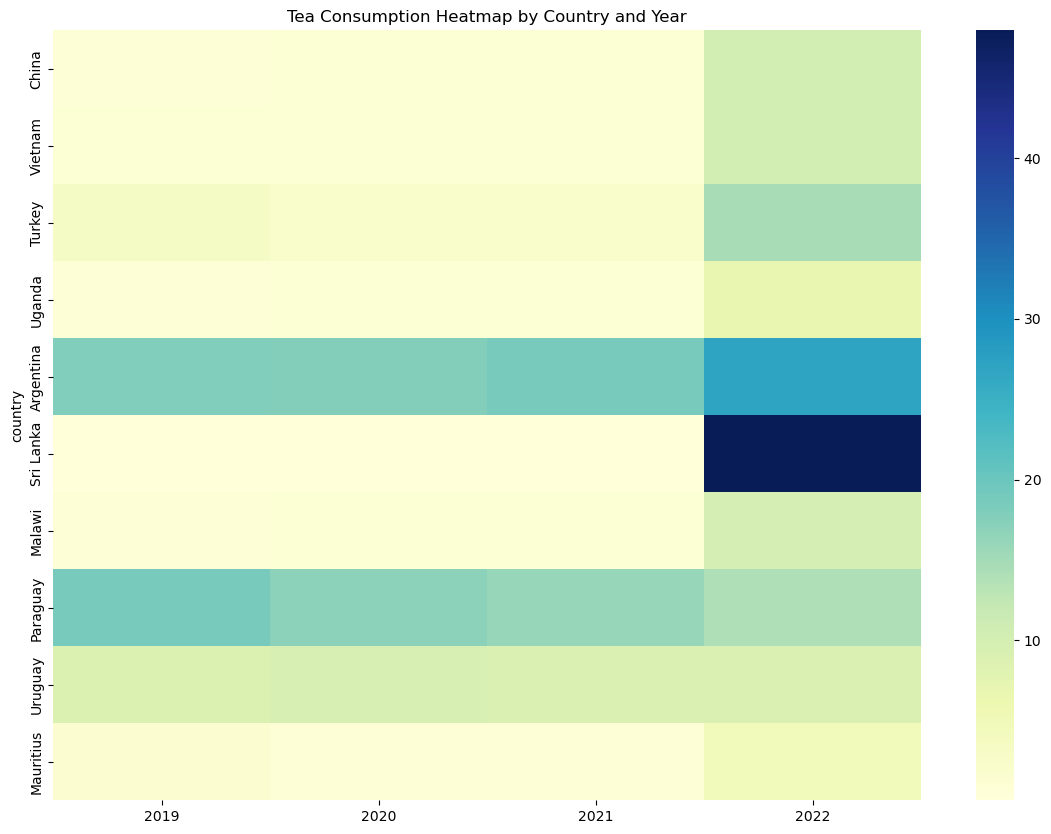

In [29]:
#Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df_top.set_index('country'), cmap='YlGnBu')
plt.title("Tea Consumption Heatmap by Country and Year")

Text(0.5, 1.0, 'Annual Tea Consumption by Top 10 Countries in 2022')

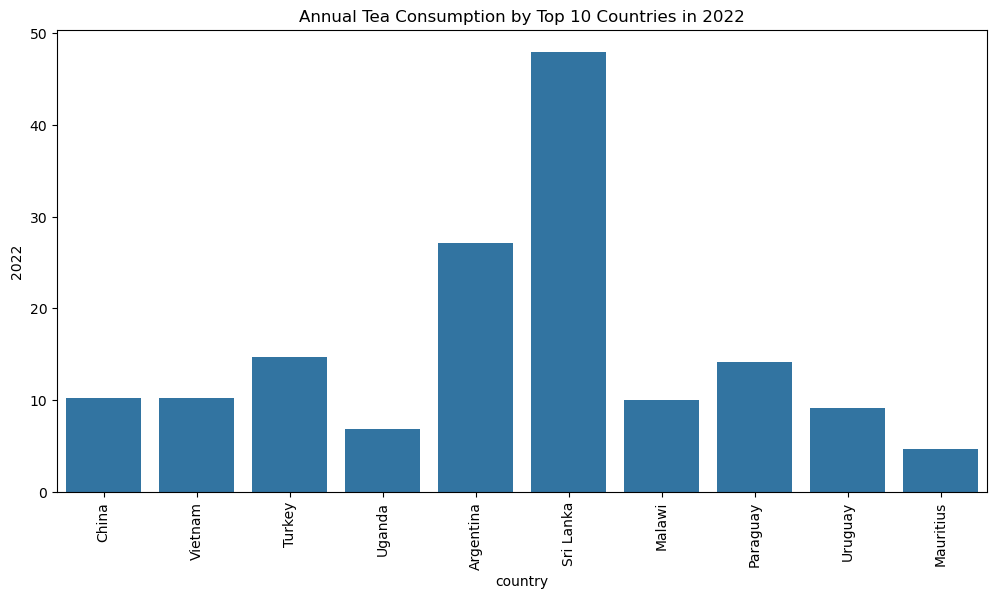

In [30]:
#Bar plot
plt.figure(figsize=(12,6))
sns.barplot(x='country', y='2022', data=df_top)
plt.xticks(rotation=90)
plt.title("Annual Tea Consumption by Top 10 Countries in 2022")

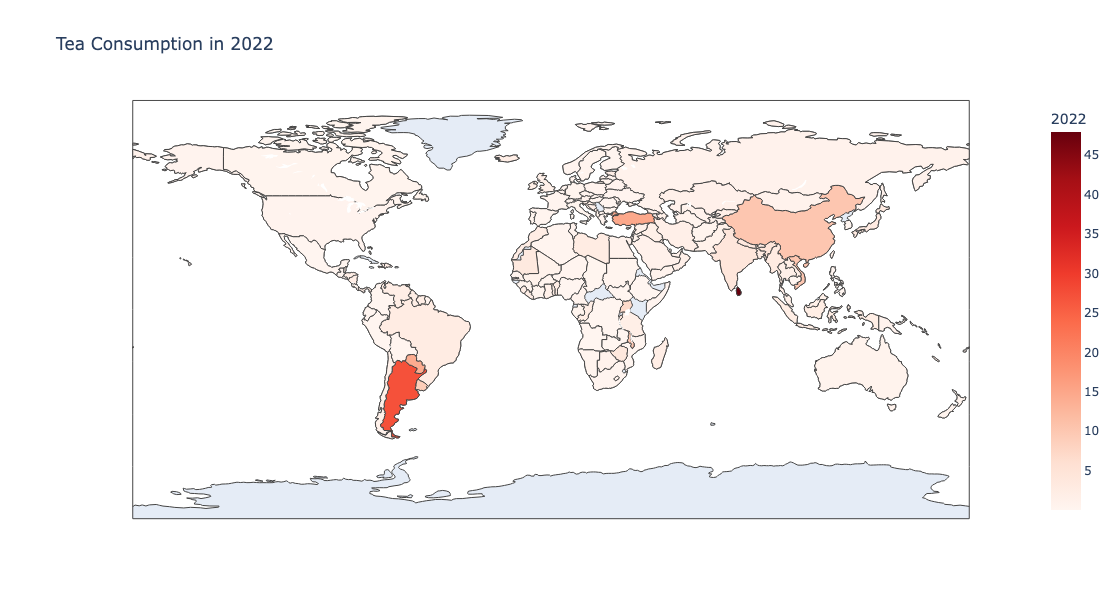

In [31]:
#Chloropleth Map
fig = px.choropleth(df,
                    locations='country',
                    locationmode='country names',
                    color='2022',
                    color_continuous_scale='Reds',
                    title='Tea Consumption in 2022',
                    width=1000,         # Adjust width in pixels
                    height=600         # Adjust height in pixels
)

fig.show()